# Exploratory Data Analysis

The first step is to conduct an exploratory data analysis (EDA), to identify trends, patterns, and outliers in the dataset. Note: Only Uber data will be used in this analysis and the upcoming modelling.


First, we import the necessary Python libraries.

In [15]:
#@title Imports for Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the CSV using Pandas and taking a quick look inside the dataset below.

In [16]:

df = pd.read_csv('../data/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
cab_types = df['cab_type'].unique()
print(cab_types)

['Lyft' 'Uber']


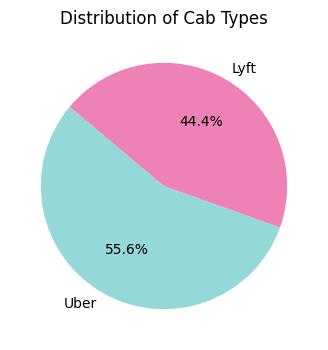

In [25]:
cab_type_counts = df['cab_type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(cab_type_counts, labels=cab_type_counts.index, autopct='%1.1f%%', startangle=140, colors = ['#94d8d8', '#ee82b7'])
plt.title('Distribution of Cab Types')
plt.show()

Creating a Pandas DataFrame with only Uber records, as we will be only using Uber data in our model development.

In [29]:
df2 = df[df['cab_type'] != 'Lyft']
new_cab_types = df2['cab_type'].unique()
print(new_cab_types)

['Uber']


In [31]:
print(df2.isnull().sum())
print(df2.isnull().sum().sum())

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [33]:
mean_value = round(df2['price'].mean(),2)
print('Filling Price with mean value of', mean_value)
df2['price'].fillna(value=mean_value, inplace=True)

Filling Price with mean value of 15.8


/var/folders/fn/yld5z5p52q34cgp7bxwnlx580000gn/T/ipykernel_20310/2732786982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'].fillna(value=mean_value, inplace=True)
